# Notebook to Perform Thematic Analysis - aka Topics Modeling - from Written Comments using Hugging Face API and K-Means Clustering

In [ ]:
!pip install transformers
!pip install datasets
!pip install torch
!pip install scikit-learn
!pip install umap-learn
#!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.8 MB/s eta 0:00

In [ ]:
from transformers import AutoTokenizer, AutoModel
from transformers import DistilBertForMaskedLM, DistilBertTokenizerFast, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_dataset
import torch
from sklearn.cluster import KMeans
import umap
import io
from google.colab import files
import numpy as np
import pandas as pd
import io

In [ ]:
"""
user_feedback = [
    "The app's interface is clean and easy to use.",
    "Great customer service, they resolved my issue quickly.",
    "I found the product to be of low quality.",
    "Delivery was prompt and the product arrived in good condition.",
    "There are too many ads in the app, it's very annoying.",
    "I love the new features in the recent update!",
    "The website is slow and often crashes, which is frustrating.",
    "Excellent food, but the delivery was late.",
    "Customer service was rude and unhelpful.",
    "The product did not match its description on the website.",
    "I love the new design of the app. It's clean and easy to navigate.",
    "The recent update made the app so much better. Great job!",
    "I'm not a fan of the new layout. It's confusing and not user-friendly.",
    "There's a bug that causes the app to crash when I try to upload a photo.",
    "The customer service is excellent. They resolved my issue within a day.",
    "The app takes too long to load. Please fix this issue.",
    "I appreciate the new features, but I think there's still room for improvement.",
    "The delivery was fast and the product was in good condition. I'm very satisfied.",
    "The new update drains my phone's battery. Please look into this.",
    "The app is very useful and convenient. I use it every day.",
    "I think the price is a bit high for what the app offers.",
    "The app has a lot of ads which is very annoying.",
    "I enjoy using the app. It's fun and engaging.",
    "The quality of the products is always good. I've never been disappointed.",
    "I had some issues with the app, but the recent update fixed them.",
    "The app is constantly freezing. It's very frustrating.",
    "The customer service is not helpful. They didn't solve my problem.",
    "I had a great experience with the delivery. The package arrived early.",
    "I like the variety of products available in the app. There's something for everyone.",
    "I'm having trouble logging in after the update. Please help."
]
"""

In [ ]:
uploadedq2 = files.upload()
dfq2 = pd.read_csv(io.BytesIO(uploadedq2["MasterLLMMSHintsSheet7.csv"]))

Saving MasterLLMMSHintsSheet7.csv to MasterLLMMSHintsSheet7.csv


In [ ]:
uploadedq3 = files.upload()
dfq3 = pd.read_csv(io.BytesIO(uploadedq3["MasterLLMMSHintsSheet9.csv"]))


Saving MasterLLMMSHintsSheet9.csv to MasterLLMMSHintsSheet9.csv


In [ ]:
uploadedq1 = files.upload()
dfq1 = pd.read_csv(io.BytesIO(uploadedq1["MasterLLMMSHintsSheet4.csv"]))

Saving MasterLLMMSHintsSheet4.csv to MasterLLMMSHintsSheet4.csv


In [ ]:
print(dfq1.columns)

Index(['"q1H1m"', '"q1H1t"', '"q1H2m"', '"q1H2t"', '"q1H3m"', '"q1H3t"'], dtype='object')


In [ ]:
uploadedq4 = files.upload()
dfq4 = pd.read_csv(io.BytesIO(uploadedq4["MasterLLMMSHintsSheet6.csv"]))

Saving MasterLLMMSHintsSheet6.csv to MasterLLMMSHintsSheet6.csv


In [ ]:
uploadedq5 = files.upload()
dfq5 = pd.read_csv(io.BytesIO(uploadedq5["MasterLLMMSHintsSheet12.csv"]))
print(dfq5.columns)

Saving MasterLLMMSHintsSheet12.csv to MasterLLMMSHintsSheet12.csv
Index(['"q5H1m"', '"q5H1t"', '"q5H2m"', '"q5H2t"', '"q5H3m"', '"q5H3t"'], dtype='object')


In [ ]:
print(dfq4.columns)

Index(['"q4H1m"', '"q4H1t"', '"q4H2m"', '"q4H2t"'], dtype='object')


In [ ]:
# For fine-tuning:

# model = DistilBertForMaskedLM.from_pretrained('distilbert-base-uncased')
# tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Q2 and Q3 comments

In [ ]:
q2H1t = list(dfq2['"q2H1t"'])
q2H1t = [s.replace('"', "") for s in q2H1t]
q2H1t = list(filter(None, q2H1t))
print(q2H1t)
#q2H1t_str = ' '.join(q2H1t)

q2H2t = list(dfq2['"q2H2t"'])
q2H2t = [s.replace('"', "") for s in q2H2t]
q2H2t = list(filter(None, q2H2t))
#q2H2t_str = ' '.join(q2H2t)

q2H3t = list(dfq2['"q2H3t"'])
q2H3t = [s.replace('"', "") for s in q2H3t]
q2H3t = list(filter(None, q2H3t))
#q2H3t_str = ' '.join(q2H3t)

q2H4t = list(dfq2['"q2H4t"'])
q2H4t = [s.replace('"', "") for s in q2H4t]
q2H4t = list(filter(None, q2H4t))
#q2H4t_str = ' '.join(q2H4t)

q3H1t = list(dfq3['"q3H1t"'])
q3H1t = [s.replace('"', "") for s in q3H1t]
q3H1t = list(filter(None, q3H1t))
#q3H1t_str = ' '.join(q3H1t)

q3H2t = list(dfq3['"q3H2t"'])
q3H2t = [s.replace('"', "") for s in q3H2t]
q3H2t = list(filter(None, q3H2t))
#q3H2t_str = ' '.join(q3H2t)

q3H3t = list(dfq3['"q3H3t"'])
q3H3t = [s.replace('"', "") for s in q3H3t]
q3H3t = list(filter(None, q3H3t))
#q3H3t_str = ' '.join(q3H3t)

q3H4t = list(dfq3['"q3H4t"'])
q3H4t = [s.replace('"', "") for s in q3H4t]
q3H4t = list(filter(None, q3H4t))
#q3H4t_str = ' '.join(q3H4t)

['The L-shape example', 'The first sentence was more useful', 'I liked being talked through the problem.', 'I like the inclusion of “think about the letter L”', 'I liked the L-shaped hint', 'more visual explanation', 'This has a more readable, in depth explanation', 'This helps explain what a complementary angle is AND gives a sufficient example!', 'I chose this variant because it uses more accessible language, such as add up to instead of sum and provides a real-life example of L-shape ', 'Gives example', 'Provides a better explanation', 'gives more detail related specifically to the image shown', 'The language was more explanatory and gave the helpful hunt of thinking it like a L-shape.', 'Gives the student a way to think of the entire graph instead of the line', 'this hint is more helpful because it goes in depth with the definitions rather than assuming the student knows', 'The language is more descriptive ie the explanation that a right angle forms an L shape', 'Using easier langu

In [ ]:
"""
user_feedback = [
    q2H1t_str,
    q2H2t_str,
    q2H3t_str,
    q2H4t_str,
    q3H1t_str,
    q3H2t_str,
    q3H3t_str,
    q3H4t_str
]
"""

user_feedback = []
user_feedback.extend(q2H1t)
user_feedback.extend(q2H2t)
user_feedback.extend(q2H3t)
user_feedback.extend(q2H4t)
user_feedback.extend(q3H1t)
user_feedback.extend(q3H2t)
user_feedback.extend(q3H3t)
user_feedback.extend(q3H4t)
print(user_feedback)

['The L-shape example', 'The first sentence was more useful', 'I liked being talked through the problem.', 'I like the inclusion of “think about the letter L”', 'I liked the L-shaped hint', 'more visual explanation', 'This has a more readable, in depth explanation', 'This helps explain what a complementary angle is AND gives a sufficient example!', 'I chose this variant because it uses more accessible language, such as add up to instead of sum and provides a real-life example of L-shape ', 'Gives example', 'Provides a better explanation', 'gives more detail related specifically to the image shown', 'The language was more explanatory and gave the helpful hunt of thinking it like a L-shape.', 'Gives the student a way to think of the entire graph instead of the line', 'this hint is more helpful because it goes in depth with the definitions rather than assuming the student knows', 'The language is more descriptive ie the explanation that a right angle forms an L shape', 'Using easier langu

# Q1 and Q4 comments

In [ ]:
q1H1m = list(dfq1['"q1H1m"'])
q1H1m = [s.replace('"', "") for s in q1H1m]
q1H1m = list(filter(None, q1H1m))

q1H2m = list(dfq1['"q1H2m"'])
q1H2m = [s.replace('"', "") for s in q1H2m]
q1H2m = list(filter(None, q1H2m))

q1H3m = list(dfq1['"q1H3m"'])
q1H3m = [s.replace('"', "") for s in q1H3m]
q1H3m = list(filter(None, q1H3m))

q4H1m = list(dfq4['"q4H1m"'])
q4H1m = [s.replace('"', "") for s in q4H1m]
q4H1m = list(filter(None, q4H1m))

q4H2m = list(dfq4['"q4H2m"'])
q4H2m = [s.replace('"', "") for s in q4H2m]
q4H2m = list(filter(None, q4H2m))

In [ ]:
user_feedback2 = []
user_feedback2.extend(q1H1m)
user_feedback2.extend(q1H2m)
user_feedback2.extend(q1H3m)
user_feedback2.extend(q4H1m)
user_feedback2.extend(q4H2m)
print(user_feedback2)

['I like the visual option', 'The visual was very helpful', 'The visual of the actual fractions.', 'I like being able to see the explanation in pictures/numbers more than words. I get a bit lost in the words version.', 'Seeing the numbers is easier than just seeing the words', 'more visual', 'I think this is more helpful because is has both a verbal component and a visual component while the first one only has a verbal component.', 'this visually demonstrates the answer and is more helpful than just telling a student!', 'I chose this variant because it provides a visual of how the fraction would be rewritten, although this might give away too much information for kids.', 'Image captures my attention instantly', 'the fraction visual is easier to observe then the words', 'Visual really helps the viewer understand what their end goal should look like.', 'There is a mathematical visual to support thinking.\n\nThe second would be beneficial if it was read out loud.', 'Too many words can som

# Q5

In [ ]:
# Index(['"q5H1m"', '"q5H1t"', '"q5H2m"', '"q5H2t"', '"q5H3m"', '"q5H3t"'], dtype='object')

q5H1m = list(dfq5['"q5H1m"'])
q5H1m = [s.replace('"', "") for s in q5H1m]
q5H1m = list(filter(None, q5H1m))

q5H1t = list(dfq5['"q5H1t"'])
q5H1t = [s.replace('"', "") for s in q5H1t]
q5H1t = list(filter(None, q5H1t))

q5H2m = list(dfq5['"q5H2m"'])
q5H2m = [s.replace('"', "") for s in q5H2m]
q5H2m = list(filter(None, q5H2m))

q5H2t = list(dfq5['"q5H2t"'])
q5H2t = [s.replace('"', "") for s in q5H2t]
q5H2t = list(filter(None, q5H2t))

q5H3m = list(dfq5['"q5H3m"'])
q5H3m = [s.replace('"', "") for s in q5H3m]
q5H3m = list(filter(None, q5H3m))

q5H3t = list(dfq5['"q5H3t"'])
q5H3t = [s.replace('"', "") for s in q5H3t]
q5H3t = list(filter(None, q5H3t))

In [ ]:
user_feedback3 = []
user_feedback3.extend(q5H1m)
user_feedback3.extend(q5H1t)
user_feedback3.extend(q5H2m)
user_feedback3.extend(q5H2t)
user_feedback3.extend(q5H3m)
user_feedback3.extend(q5H3t)

print(user_feedback3)

['More basic language is more accessible!', 'this is less dense to read and easier to understand', 'More direct', 'Less words', 'Allows the student to start thinking of the problem', 'less wordy', 'This would make more sense to younger students.', 'It only talks about fractions instead of also introducing the idea of place value, which can make it be confusing.', 'It is easier to understand', 'Explains it better', 'more conversational', 'It feels more guiding', 'active recollection is important', 'I liked the place value hint', 'nice reminder', "-ths are decimal endings and that's easier to explain to children than fractions", 'this provides a better breakdown to solve the problem', 'Reference of place values', 'connects directly to decimals which is what the question asks for', "The second hint's wording made more sense to me. The like threw me off in the first hint.", 'I learned about tenths, hundredths and thousandths as decimals, therefore, I find it easier to think of the numbers 

# BERT Embeddings (user_feedback2 = Q1 and Q4) and (user_feedback = Q2 and Q3)

In [ ]:
inputs = tokenizer(user_feedback3, return_tensors="pt", truncation=True, padding=True, max_length=512)

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)
embeddings = outputs.last_hidden_state[:, 0, :].numpy()

In [ ]:
reducer = umap.UMAP()
embeddings_reduced = reducer.fit_transform(embeddings)

In [ ]:
num_topics = 3
kmeans = KMeans(n_clusters=num_topics)
kmeans.fit(embeddings_reduced)
predicted_topics = kmeans.predict(embeddings_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Perform K-Means Clustering of Embeddings for (user_feedback2 = Q1 and Q4) and (user_feedback = Q2 and Q3)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

top_feedback_per_cluster = 3
for i in range(num_topics):
    print(f"\nTop feedback for Cluster {i+1}:")
    # Get the centroid of this cluster
    centroid = kmeans.cluster_centers_[i]
    # Compute cosine similarity between this centroid and all feedback embeddings
    similarities = cosine_similarity([centroid], embeddings_reduced)[0]
    # Get the indices of the feedback with highest similarity
    top_indices = similarities.argsort()[-top_feedback_per_cluster:][::-1]
    for idx in top_indices:
        print(user_feedback3[idx])


Top feedback for Cluster 1:
this is less dense to read and easier to understand
It is easier to understand
Reference of place values

Top feedback for Cluster 2:
This explains the process of converting a fraction to a decimal which is important for the students comprehension instead of just giving them the answer.
This one gives values in number form and asks how to make it a fraction which is explicit and direct which seems to be what the student needs.
I like seeing the steps like this better

Top feedback for Cluster 3:
I find these variants to be very similar and do not necessarily have a preference between the two.
The second option does not make any sense.
Students can see 32/1000 and realize they have to move over the decimal over 3 times, the amount of zeros


In [ ]:
print(predicted_topics)

[0 0 0 0 1 0 2 1 0 2 0 2 0 2 2 1 0 0 1 2 1 1 1 1 1 0 2 2 0 1 1 0 0 2 1 0 1
 1 1 1 0 2 2 2 1 1 0 2 2 1 1 0 0 2 2 1 0 0 1 2 0 1 1 0 2 1 0 2 0 1 2 1 2 1
 2]


# Reduce Dimensions of Embeddings to Show Scatter Plot

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=7)
embeddings_2d = tsne.fit_transform(embeddings)

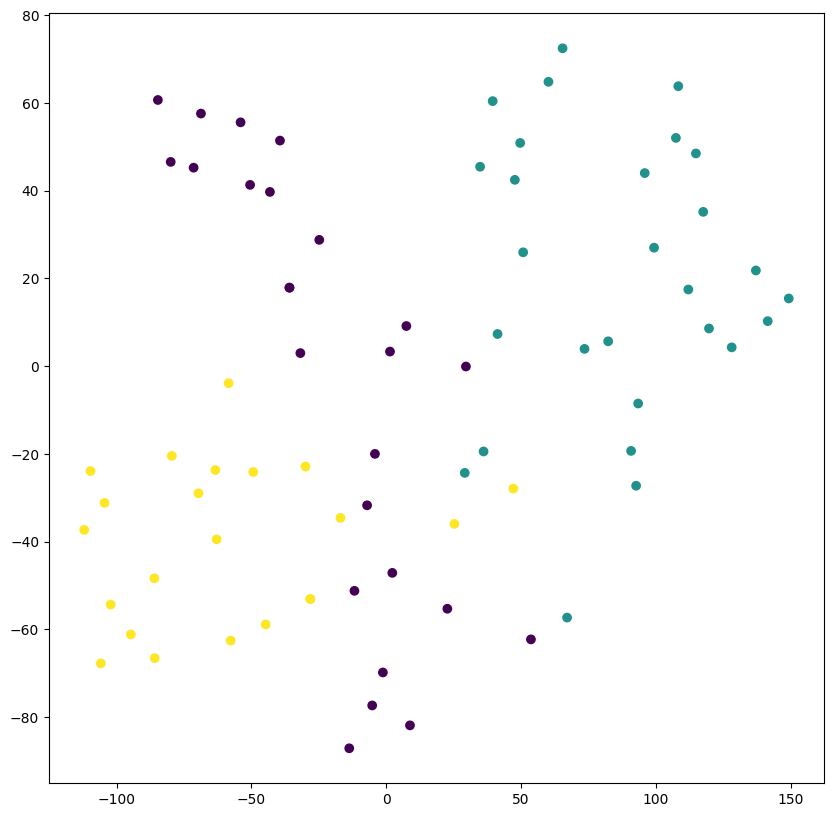

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=predicted_topics)
plt.show()

# Do an Interactive Scatter Plot using Bokeh Library

In [ ]:
!pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bokeh.models import HoverTool, LabelSet
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category10
from bokeh.models import ColumnDataSource, DataTable, TableColumn

output_notebook()

In [ ]:
# Define colors
colors = [Category10[10][i] for i in predicted_topics]

# Create a new plot with a title and axis labels
p = figure(title="Response Clusters", x_axis_label='Component 1', y_axis_label='Component 2')

In [ ]:
# Add a hover tool that displays the user feedback
hover = HoverTool(tooltips=[("Feedback", "@desc")])
p.add_tools(hover)

# Add the data to the plot
source = dict(
    x=embeddings_2d[:, 0],
    y=embeddings_2d[:, 1],
    desc=user_feedback3,
    color=colors
)
p.circle('x', 'y', color='color', size=10, source=source)

# Add labels to each point
#labels = LabelSet(x='x', y='y', text='desc', level='glyph', x_offset=5, y_offset=5, source=source, render_mode='canvas')
#p.add_layout(labels)

# Show the result
#show(p)

GlyphRenderer(id='1042', ...)

In [ ]:
# Let's create a list of topics. This might be manually created or generated from your model
#topics = ["Topic 1", "Topic 2", "Topic 3"]

# Create a source for the data table
#source = ColumnDataSource(data=dict(topics=topics))

# Define columns for the data table
#columns = [
#    TableColumn(field="topics", title="Topics"),
#]

# Create a data table
#data_table = DataTable(source=source, columns=columns, index_position=-1)

from bokeh.layouts import row
#from bokeh.io import curdoc



# Add the layout to current document
#curdoc().add_root(layout)

source = ColumnDataSource(data=dict(
    x=embeddings_2d[:, 0],
    y=embeddings_2d[:, 1],
    desc=user_feedback3,
    color=colors
))

# Define columns for the data table
columns = [
    TableColumn(field="desc", title="Response")
]

# Create a data table
data_table = DataTable(source=source, columns=columns, index_position=-1, index_header="index", index_width=40, selectable=True)

# Create the layout
layout = row(p, data_table)

# Show the result
#layout = layout([[p, data_table]])
#show(layout)

# Show the result
show(layout)